In [2]:
import tensorflow as tf
from tensorflow.keras import layers ,models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [5]:
x_train,x_test = x_train/255.0,x_test/255.0

In [6]:
y_train,y_test = y_train.flatten(),y_test.flatten()

In [8]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,epochs=15,
                 validation_data=(x_test,y_test),
                 batch_size=64)
model.save('abc.h5')

Epoch 1/15


782/782 [==============================] - 9s 11ms/step - loss: 1.9711 - accuracy: 0.2760 - val_loss: 1.7844 - val_accuracy: 0.3587
Epoch 2/15
782/782 [==============================] - 8s 11ms/step - loss: 1.8239 - accuracy: 0.3390 - val_loss: 1.7204 - val_accuracy: 0.3827
Epoch 3/15
782/782 [==============================] - 8s 11ms/step - loss: 1.7722 - accuracy: 0.3603 - val_loss: 1.6844 - val_accuracy: 0.4003
Epoch 4/15
782/782 [==============================] - 8s 11ms/step - loss: 1.7304 - accuracy: 0.3749 - val_loss: 1.6703 - val_accuracy: 0.4124
Epoch 5/15
782/782 [==============================] - 8s 11ms/step - loss: 1.7067 - accuracy: 0.3838 - val_loss: 1.6355 - val_accuracy: 0.4193
Epoch 6/15
782/782 [==============================] - 8s 11ms/step - loss: 1.6871 - accuracy: 0.3901 - val_loss: 1.5928 - val_accuracy: 0.4338
Epoch 7/15
782/782 [==============================] - 8s 11ms/step - loss: 1.6650 - accuracy: 0.4007 - val_loss: 1.5860 - val_accuracy: 0.43

C:\Users\Student\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


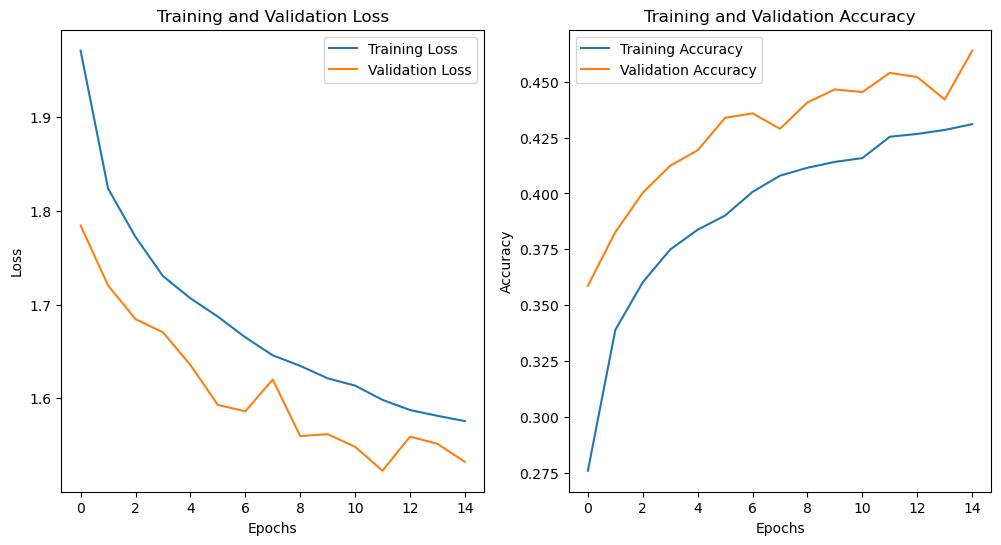

In [19]:
# Plotting the loss curve
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

